In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import lasagne
import pickle

Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled, CuDNN 4007)


In [2]:
import sys
sys.path.append('../')
import ghiaseddin

import numpy as np

We need to import caffe in order to make the comparisons

In [4]:
sys.path.append('/home/yasser/installs/caffe/python/')
import caffe

here is an image for our processing usage

In [5]:
image_addr = '/home/yasser/installs/caffe/examples/images/cat.jpg'

creating the googlenet extractor of ghiaseddin

(1024,)


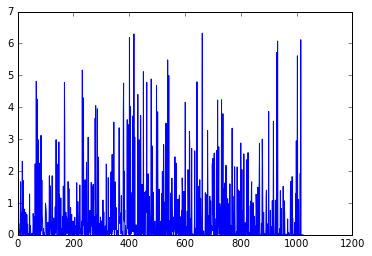

In [6]:
extractor = ghiaseddin.GoogLeNet(ghiaseddin.settings.googlenet_weights)
ghiaseddin_feats = extractor.output_for_image(image_addr)

print ghiaseddin_feats.shape
plt.plot(ghiaseddin_feats)

creating the caffe's network

(1024,)


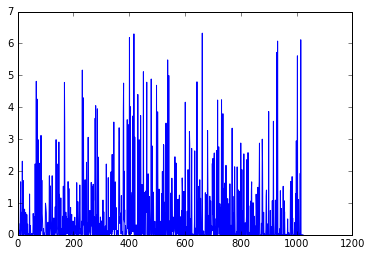

In [7]:
image = caffe.io.load_image(image_addr)
net = caffe.Net('/home/yasser/installs/caffe/models/bvlc_googlenet/deploy.prototxt',
                '/home/yasser/installs/caffe/models/bvlc_googlenet/bvlc_googlenet.caffemodel',
                caffe.TEST)

transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.array([104, 117, 123]))
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2,1,0))
transformed_image = transformer.preprocess('data', image)

net.blobs['data'].reshape(1, 3, 224, 224)
net.blobs['data'].data[...] = transformed_image
out = net.forward()
caffe_feats = net.blobs['pool5/7x7_s1'].data.flatten()

print caffe_feats.shape
plt.plot(caffe_feats)

In [8]:
print np.all(ghiaseddin_feats == caffe_feats)

np.linalg.norm(ghiaseddin_feats - caffe_feats)

False


2.9996238e-05

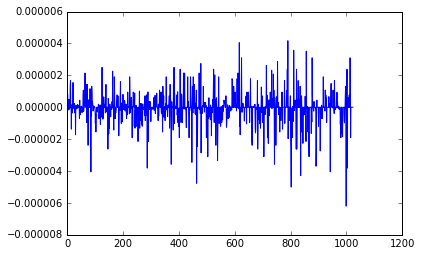

In [9]:
plt.plot(ghiaseddin_feats - caffe_feats)

It seems that the difference is very small. I guess it is good.